In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras import Sequential

In [2]:
x = np.arange(0, 100, 0.1)
y = 0.5*np.sin(2*x)-np.cos(x/2.0)

In [3]:
seq_data = y.reshape(-1, 1)

In [4]:
print(seq_data.shape)
print(seq_data[:5])

(1000, 1)
[[-1.        ]
 [-0.89941559]
 [-0.80029499]
 [-0.70644984]
 [-0.62138853]]


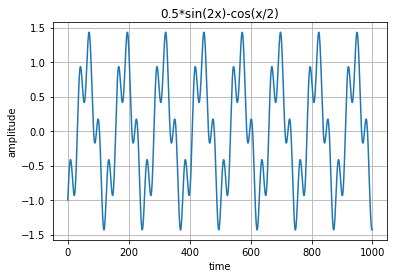

In [5]:
plt.grid()
plt.title('0.5*sin(2x)-cos(x/2)')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(seq_data)

plt.show()

In [6]:
def seq2dataset(seq, window, horizon):
    X = []
    Y = []
    
    for i in range(len(seq)-(window+horizon)+1):
        
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

In [7]:
w=20  # window size
h=1   # horizon factor

X, Y = seq2dataset(seq_data, w, h)

print(X.shape, Y.shape)

(980, 20, 1) (980, 1)


In [8]:
split_ratio = 0.8

split = int(split_ratio*len(X))

x_train=X[0:split]
y_train=Y[0:split]

x_test=X[split:]
y_test=Y[split:]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(784, 20, 1) (784, 1) (196, 20, 1) (196, 1)


In [9]:
model = Sequential()

model.add(SimpleRNN(units=128, activation='tanh', input_shape=x_train[0].shape))

model.add(Dense(1))

In [10]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               16640     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [11]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5)

hist=model.fit(x_train, y_train,
         validation_data=(x_test, y_test),
         epochs=100, batch_size=16,
         callbacks=[early_stop])

Epoch 1/100
49/49 [==============================] - 1s 9ms/step - loss: 0.0499 - mae: 0.1279 - val_loss: 0.0015 - val_mae: 0.0322
Epoch 2/100
49/49 [==============================] - 0s 4ms/step - loss: 8.6492e-04 - mae: 0.0230 - val_loss: 9.2737e-04 - val_mae: 0.0248
Epoch 3/100
49/49 [==============================] - 0s 3ms/step - loss: 6.6140e-04 - mae: 0.0200 - val_loss: 4.1720e-04 - val_mae: 0.0157
Epoch 4/100
49/49 [==============================] - 0s 3ms/step - loss: 4.9960e-04 - mae: 0.0174 - val_loss: 3.1929e-04 - val_mae: 0.0136
Epoch 5/100
49/49 [==============================] - 0s 3ms/step - loss: 2.9162e-04 - mae: 0.0130 - val_loss: 1.9416e-04 - val_mae: 0.0100
Epoch 6/100
49/49 [==============================] - 0s 4ms/step - loss: 2.2925e-04 - mae: 0.0118 - val_loss: 1.3968e-04 - val_mae: 0.0095
Epoch 7/100
49/49 [==============================] - 0s 3ms/step - loss: 2.1348e-04 - mae: 0.0110 - val_loss: 1.7286e-04 - val_mae: 0.0111
Epoch 8/100
49/49 [================

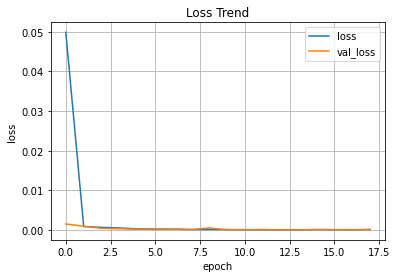

In [12]:
plt.title('Loss Trend')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.legend(loc='best')
plt.show()

In [21]:
pred=model.predict(x_test)
print(pred[0])
print(np.argmax(pred[0]))

7/7 [==============================] - 0s 2ms/step
[0.5297116]
0


In [22]:
rand_idx=np.random.randint(0, len(y_test), size=5)
print('random id x=', rand_idx, '\n')
print('pred =', pred.flatten()[rand_idx])
print('label = ', y_test.flatten()[rand_idx])

random id x= [165 151   8 184 130] 

pred = [-0.18095393  1.123328    0.55408716 -0.48619717  0.4128955 ]
label =  [-0.17264688  1.10776732  0.56076803 -0.49082954  0.41538233]


7/7 [==============================] - 0s 2ms/step


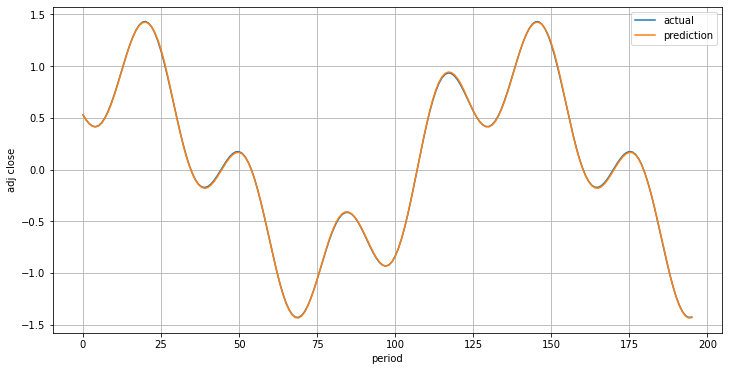

In [26]:
pred = model.predict(x_test)

plt.figure(figsize=(12,6))
plt.ylabel('adj close')
plt.xlabel('period')
plt.plot(y_test, label='actual')
plt.plot(pred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

In [25]:
print(np.sum(abs(y_test-pred)/y_test)/len(x_test))

0.006335943931580122
